We use past data to create a simulation.

Current_revenue = Previous_revenue * (1 + growth_rate)

Cogs (cost of goods sold) - modeled as a percentage of revenues
Opex (operating expenses) - modeled as a percentage of revenues

Revenues – Cost of goods sold = Gross profit

Revenues – Opex = Operating profit


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# revenue mean
rev_m = 170
# revenue std. deviation
rev_stdev = 20
iterations = 1000

In [ ]:
# produce the simulation of future revenues with random normal distribution generator
rev = np.random.normal(rev_m, rev_stdev, iterations)
# rev

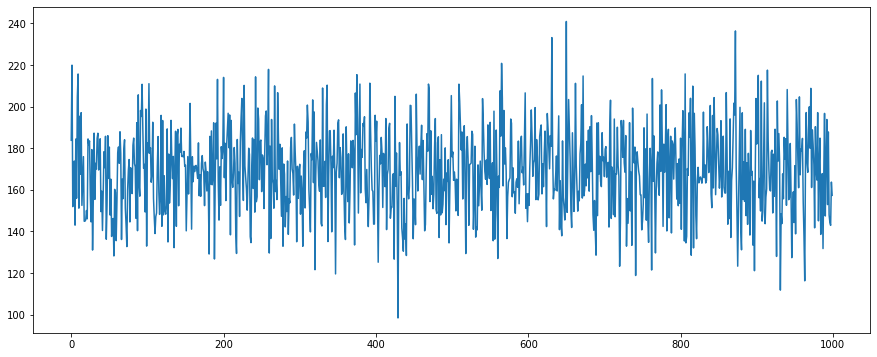

In [4]:
plt.figure(figsize=(15,6))
plt.plot(rev)
plt.show()

COGS ~ 60% of the revenues

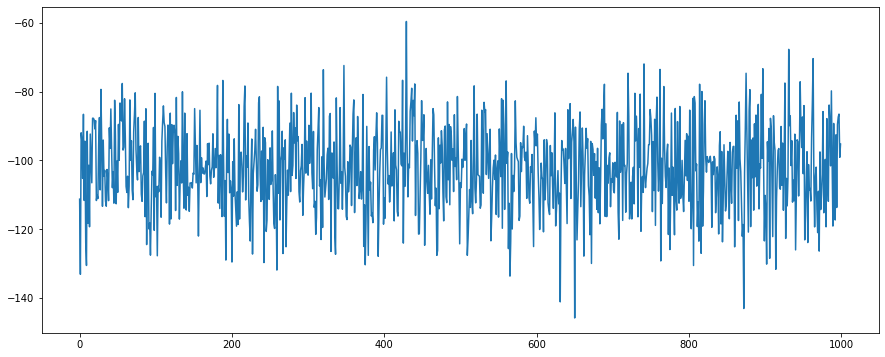

In [7]:
COGS = -(rev * np.random.normal(0.6, 0.1))
plt.figure(figsize=(15,6))
plt.plot(COGS)
plt.show()

In [8]:
COGS.mean()

-102.33423845943933

In [9]:
COGS.std()

12.361748688100558

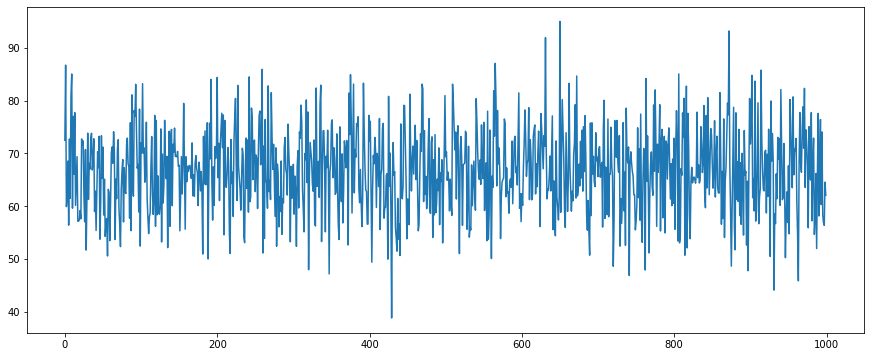

In [10]:
Gross_Profit = rev + COGS
Gross_Profit

plt.figure(figsize=(15,6))
plt.plot(Gross_Profit)
plt.show()

In [13]:
print("Max gross profit: {}\nMin gross profit: {}" \
      .format(max(Gross_Profit), min(Gross_Profit)))
print("Gross profit mean: {}\nGross profit std.dev.: {}" \
      .format(Gross_Profit.mean(), Gross_Profit.std()))

Max gross profit: 95.01534231275625
Min gross profit: 38.8000839589857
Gross profit mean: 66.6424085604047
Gross profit std.dev.: 8.050254919520095


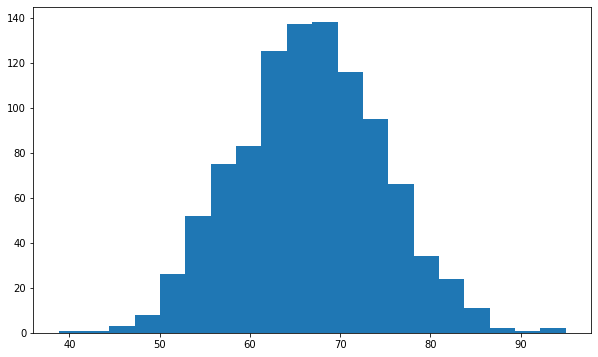

In [21]:
plt.figure(figsize=(10,6))
plt.hist(Gross_Profit, bins=20)
plt.show()

Price_Today = Price_Yesterday * $e^r$ , where r - log return of share price between yesterday and today

$e^r= e^{ln(\frac{privece\ today}{price\ yesterday})}$

